In [1]:
import glob
import numpy as np
import scipy.stats as stats
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt
import pandas as pd

path_dir = "C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2/"
path_prova = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3/'

In [2]:
def read_files_data(path_dir):
    print('---AVVIO LETTURA---')
    for elem in glob.glob(path_dir + "*.csv"):
        print('opening: ', elem)
        yield elab_file(elem)
          
def elab_file(path_file):
    df = pd.read_csv(path_file)
    #filtro 
    df = df[df.responseMessage == 'OK']

    #calcolo duration
    TimeStapMax = df['timeStamp'].max()
    TimeStapMin = df['timeStamp'].min()
    Duration=(TimeStapMax-TimeStapMin)/1000
    
    #valuto COV
    ResponseTime = None
    COV = df['elapsed'].std()/df['elapsed'].mean()
    if COV < 0.5:
        #prendo la media
        ResponseTime = df['elapsed'].mean()
    elif COV >= 0.5:
        ResponseTime = df['elapsed'].median()
    #calcolo Throughput
    Throughput = df.shape[0] / Duration;
    #calcolo Power
    Power = Throughput/ResponseTime
    
    return [Throughput, ResponseTime, Power]

def get_data(path_dir):
    df = pd.DataFrame(None, columns=['Throughput', 'ResponseTime', 'Power'])     
    for datas in read_files_data(path_dir):
        df.loc[len(df)] = datas    
    #df_COV = df.groupby(np.arange(len(df))//3).agg(lambda x: x.std()/x.mean())
    return df, df.groupby(np.arange(len(df))//3).mean()

def get_data2(path_dir):
    df = pd.DataFrame(None, columns=['r','b','swpd','free','buff','cache','si','so','bi','bo','in','cs','us','sy','id','wa','st'])
    frames = [df]    
    #types = {,'swpd':np.float64,'free':np.float64,'buff':np.float64,'cache':np.float64,'si':np.float64,'so':np.float64,'bi':np.float64,'bo':np.float64,'in':np.float64,'cs':np.float64,'us':np.float64,'sy':np.float64,'id':np.float64,'wa':np.float64,'st':np.float64}
    
    i = 0
    for elem in glob.glob(path_dir + "*.csv"):
        print(elem)
        df_elem = pd.read_csv(elem, sep='\s{1,}', skiprows=1, engine='python', dtype=np.float64, keep_default_na=False)  
        df_elem['file'] = i
        i += 1
        frames.append(df_elem.groupby('file').mean())
        
    df = pd.concat(frames)
    return df, df.groupby(np.arange(len(df))//3).mean()

def do_plot(x,y, title):
    bspl = splrep(ticks,y,s=5)
    bspl_y = splev(ticks,bspl)
    plt.plot(ticks, bspl_y, 'b')
    plt.plot(ticks,y, 'ro')
    plt.grid()
    plt.title(title)

def interpolate(x, y, s=5):
    bspl = splrep(x,y,s=s)
    return splev(x,bspl)
    
def plot_df(df, ylabels, ticks, ax):
    normalized_df=(df-df.min())/(df.max()-df.min())
    for series_name, series in normalized_df.items():
        if series_name in ylabels:
            ax.plot(ticks, series, label = series_name)
    
def plot(df_j_mean, df_v_mean, ticks):
    
    y_t = df_j_mean['Throughput'].tolist()
    y_r = df_j_mean['ResponseTime'].tolist()
    y_p = df_j_mean['Power'].tolist()
    
    fig=plt.figure()
    fig.set_size_inches(15, 15)
    
    ax1 = plt.subplot(611)
    ax2 = plt.subplot(612, sharex = ax1)
    ax3 = plt.subplot(613, sharex = ax1)
    ax4 = plt.subplot(614, sharex = ax1)
    ax5 = plt.subplot(615, sharex = ax1)
    ax6 = plt.subplot(616, sharex = ax1)
    
    plt.setp([ax1, ax2, ax3, ax4], xticks = ticks, xticklabels=ticks)
    
    ax1.plot(ticks, interpolate(ticks, y_t, s=2), 'b')
    ax1.plot(ticks,y_t, 'ro')
    
    ax2.plot(ticks, interpolate(ticks, y_r, s=2), 'b')
    ax2.plot(ticks,y_r, 'ro')
    
    ax3.plot(ticks, interpolate(ticks, y_p, s=2), 'b')
    ax3.plot(ticks,y_p, 'ro')

    plot_df(df_v_mean, ['bi','bo','wa'], ticks, ax4)
    plot_df(df_v_mean, ['free', 'cache', 'buff'], ticks, ax5)
    plot_df(df_v_mean, ['us', 'sy', 'id'], ticks, ax6)
    
    ax1.grid()
    ax1.set_ylabel('Throughput')
    ax2.grid()
    ax2.set_ylabel('Response Time')
    ax3.grid()
    ax3.set_ylabel('Power')
    
    ax4.grid()
    ax4.set_ylabel('LL - I/O')
    ax4.legend()
    
    ax5.grid()
    ax5.set_ylabel('LL - MEM')
    ax5.legend()
    
    ax6.grid()
    ax6.set_ylabel('LL - CPU')
    ax6.legend()
    
    plt.show()

In [3]:
df_j, df_j_mean = get_data(path_dir)

---AVVIO LETTURA---
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura04_2k.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura05_2k.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura06_2k.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura06_6k.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura06_6k_2.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura06_6k_3.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura10_8k.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura11_8k.csv
opening:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/Osservazioni2\Cattura12_8k.csv
opening:  C:/Users/stefa/Desktop/Impianti/impiant

In [4]:
df_j_Cov = df_j.groupby(np.arange(len(df_j))//3).agg(lambda x: x.std()/x.mean())
print(df_j_Cov)

   Throughput  ResponseTime     Power
0    0.093575      0.108253  0.059297
1    0.364013      0.101885  0.457250
2    0.322913      0.091161  0.309220
3    0.277846      0.173205  0.397501
4    0.256752      0.091161  0.325023
5    0.092449      0.183303  0.154220
6    0.213136      0.216506  0.448153
7    0.159640      0.000000  0.159640


In [5]:
print(df_j)
print(df_j_mean)

    Throughput  ResponseTime      Power
0    30.265476           5.0   6.053095
1    27.282296           5.0   5.456459
2    32.923065           6.0   5.487177
3    66.137419           5.0  13.227484
4    51.337863           6.0   8.556311
5    30.420853           6.0   5.070142
6    37.234232           6.0   6.205705
7    71.361854           6.0  11.893642
8    69.378920           7.0   9.911274
9    40.196404           8.0   5.024551
10   61.543367           6.0  10.257228
11   71.651470           6.0  11.941912
12   40.781916           7.0   5.825988
13   61.543367           6.0  10.257228
14   69.125084           6.0  11.520847
15   44.634161          10.0   4.463416
16   40.114214           7.0   5.730602
17   48.299411           8.0   6.037426
18   31.594369           9.0   3.510485
19   48.840124           6.0   8.140021
20   41.199373           9.0   4.577708
21   19.920178          16.0   1.245011
22   26.896871          16.0   1.681054
23   21.602633          16.0   1.350165


In [6]:
#columns=['r','b','swpd','free','buff','cache','si','so','bi','bo','in','cs','us','sy','id','wa','st']  
df_v, df_v_mean= get_data2(path_prova)

C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast01_2k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast02_2k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast03_2k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast04_6k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast05_6k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast06_6k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast07_8k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast08_8k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast09_8k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast10_10k.csv
C:/Users/stefa/Desktop/Impianti/impianti_pratica/capacityTest/CattureVm3\Vmast11_10k.csv
C:/Users/stefa/Desktop/Impiant

In [7]:
df_v

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st
0,1.731183,0.000000,0.0,2.290975e+06,33748.451613,646273.806452,0.0,0.0,89.903226,47.365591,1710.586022,611.795699,1.198925,19.376344,79.655914,0.048387,0.0
1,2.053191,0.005319,0.0,2.286954e+06,33819.531915,648647.170213,0.0,0.0,73.101064,19.670213,2167.335106,609.867021,1.085106,20.601064,78.537234,0.037234,0.0
2,1.682796,0.000000,0.0,2.280762e+06,33886.451613,657407.935484,0.0,0.0,86.994624,66.516129,834.801075,617.537634,1.182796,17.215054,81.784946,0.037634,0.0
3,3.228723,0.010638,0.0,2.267060e+06,33908.021277,659065.893617,0.0,0.0,63.132979,20.329787,4642.867021,812.718085,1.175532,39.840426,59.069149,0.042553,0.0
4,4.523810,0.026455,0.0,2.259873e+06,34117.417989,667984.592593,0.0,0.0,168.624339,66.417989,6178.359788,877.264550,1.523810,44.571429,54.015873,0.074074,0.0
5,5.403315,0.000000,0.0,2.256202e+06,39919.734807,668222.453039,0.0,0.0,83.718232,69.966851,7862.381215,647.011050,1.110497,48.182320,50.933702,0.027624,0.0
6,3.967033,0.005495,0.0,2.267100e+06,33825.450549,654408.989011,0.0,0.0,97.076923,62.489011,4559.225275,854.010989,1.434066,49.659341,49.049451,0.038462,0.0
7,5.151351,0.000000,0.0,2.230275e+06,34274.270270,673454.140541,0.0,0.0,180.529730,69.297297,8374.594595,706.918919,1.286486,49.918919,48.935135,0.075676,0.0
8,3.126316,0.000000,0.0,2.262046e+06,33841.684211,654339.852632,0.0,0.0,85.989474,39.431579,4963.600000,1008.568421,1.689474,49.315789,49.168421,0.052632,0.0
9,4.432432,0.000000,0.0,2.288578e+06,33822.205405,649445.686486,0.0,0.0,87.043243,28.427027,8232.729730,637.059459,1.221622,51.167568,47.772973,0.032432,0.0


In [8]:
df_v_mean

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st
0,1.822390,0.001773,0.0,2.286230e+06,33818.145047,650776.304049,0.0,0.0,83.332971,44.517311,1570.907401,613.066785,1.155609,19.064154,79.992698,0.041085,0.0
1,4.385283,0.012364,0.0,2.261045e+06,35981.724691,665090.979749,0.0,0.0,105.158516,52.238209,6227.869342,778.997895,1.269946,44.198058,54.672908,0.048084,0.0
2,4.081567,0.001832,0.0,2.253141e+06,33980.468343,660734.327394,0.0,0.0,121.198709,57.072629,5965.806623,856.499443,1.470009,49.631350,49.051002,0.055590,0.0
3,3.773176,0.000000,0.0,2.266682e+06,35905.853415,656713.486893,0.0,0.0,113.962443,44.506142,6416.239659,789.091504,1.489644,50.052272,48.626833,0.050237,0.0
4,4.932288,0.000000,0.0,2.254789e+06,37937.556736,662479.030470,0.0,0.0,113.733078,55.172113,7396.224264,806.922756,1.521791,50.525066,48.148420,0.048378,0.0
5,4.946330,0.003643,0.0,2.267985e+06,37969.383508,661894.456476,0.0,0.0,79.171309,24.073017,7000.034146,709.465377,1.538178,52.200679,46.460188,0.032551,0.0
6,5.338739,0.001802,0.0,2.279876e+06,37926.926126,658623.682883,0.0,0.0,75.618018,18.758559,6651.724324,669.533333,2.169369,52.935135,45.072072,0.032432,0.0
7,4.983109,0.001802,0.0,2.278106e+06,39938.178195,663137.669721,0.0,0.0,65.968868,20.278489,3156.095794,655.020986,2.683663,53.831122,43.633993,0.043128,0.0


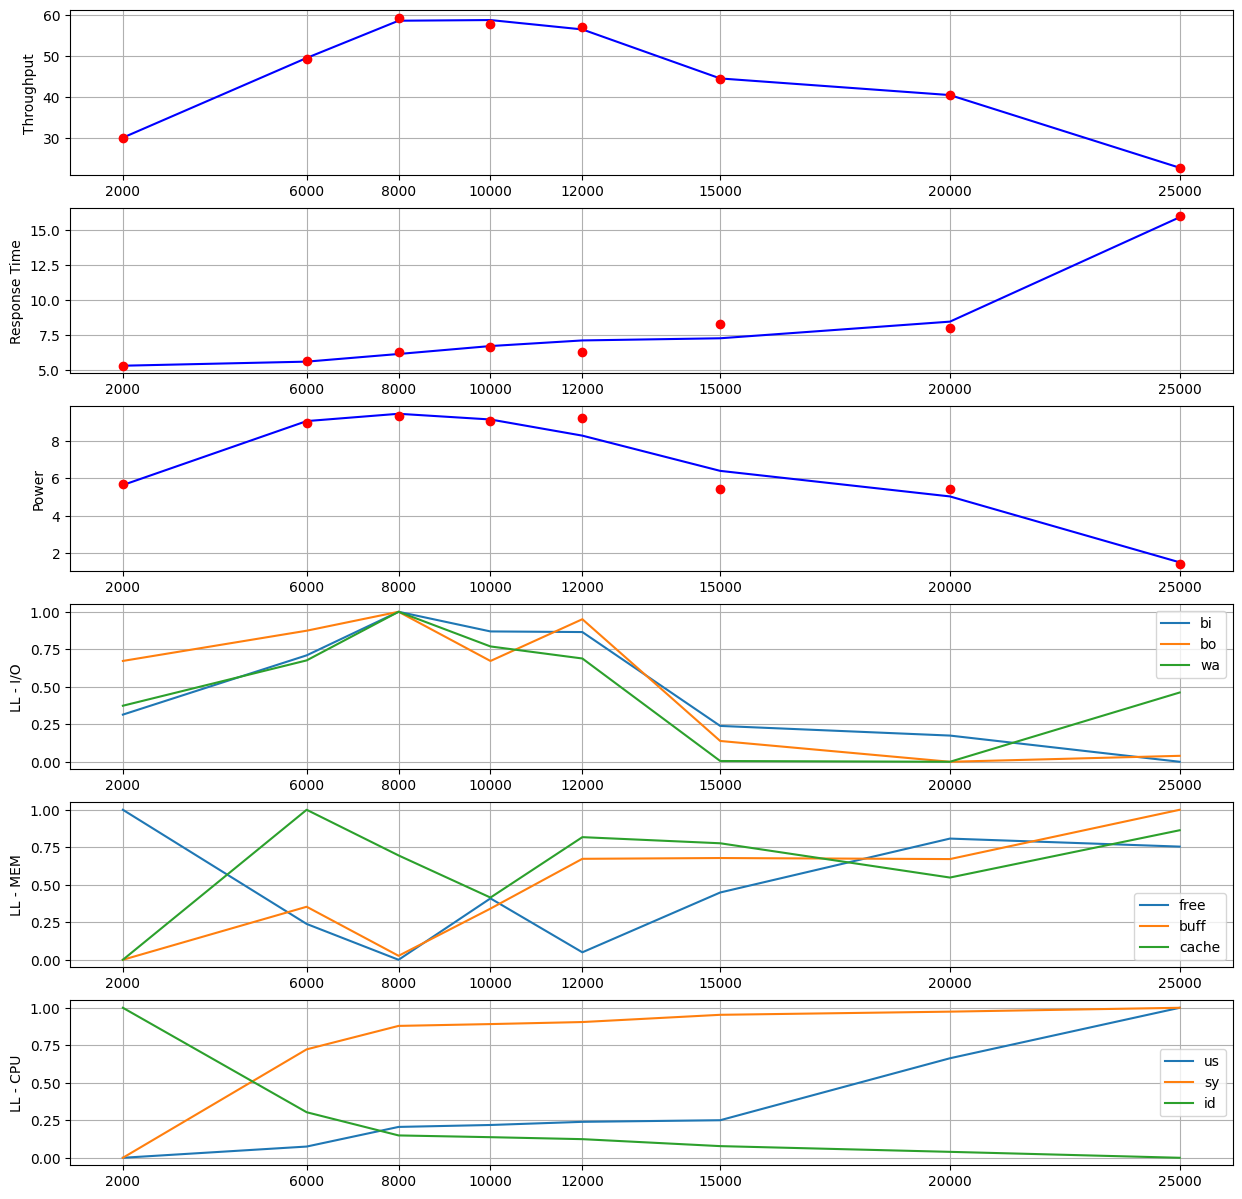

In [9]:
ticks = [2000, 6000, 8000,10000, 12000, 15000, 20000, 25000]
plot(df_j_mean,df_v_mean, ticks)